In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import timeit
import warnings
import random

<h1> Part 1 </h1>


In [4]:
warnings.filterwarnings(action='ignore')
random.seed(0)

In [5]:
graph = nx.dense_gnm_random_graph(n=100, m=500)

for (u, v) in graph.edges():
    graph.edges[u, v]['weight'] = np.random.randint(0, 100)
    

In [6]:
adjacency_matrix = nx.adjacency_matrix(graph).todense()

for row in adjacency_matrix[:3]:
    print(row)

[ 0  0  0 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0 82  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 67  0  0  0  0  0  0 74  0  0  0  0  0
  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  0
  0  0  0  0 84  0  0  0 88  0  0  0  0  0  0  0  0 81 77  0  0  0  0  0
  0 58  0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0
  0  0 68  0  0  0  0  0  0  0  0 46  0  0  0  0  0  0  0  0  0  0 88  0
  0  0 52  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 68  0  0  0  0  0  0  0  0
  0 35  0  0  0 80  0  0  0  0  0  0  0  0  0 20 14  0  0  0  0 96  0  0
  0  0  0 23  0  0  0 86  0 56 44  0  0  0  0  0  0  0  0  0  0  0  0  8
  0  0  0  0  0  0  0  0  0  0 69 23 42  0  0  0  0  0  0 15  0  0  0  0
  0  0  0  0]


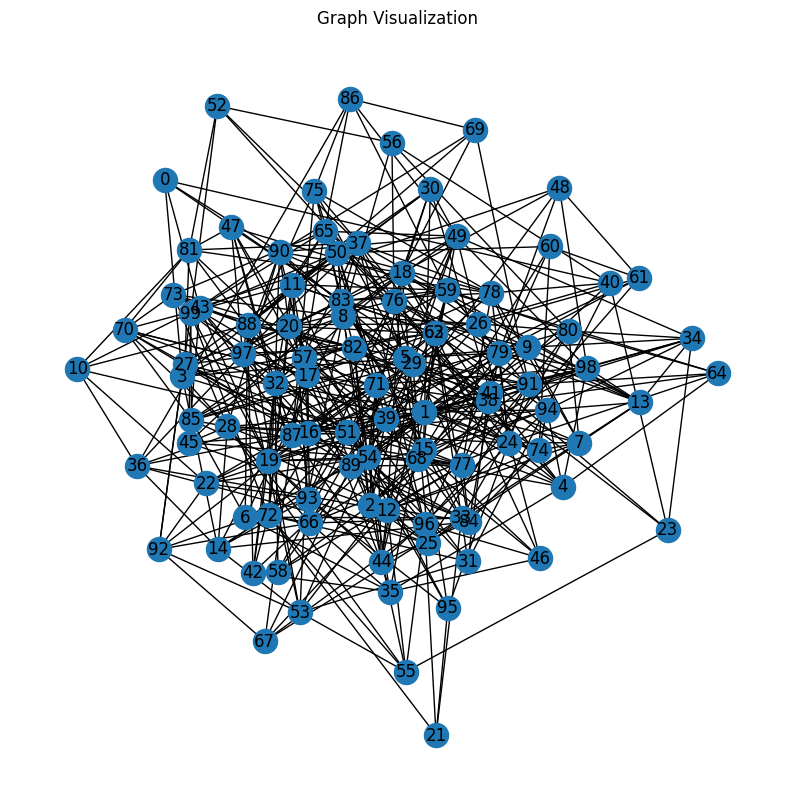

In [7]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw(graph, with_labels=True, node_color='tab:blue')

In [8]:
def dijkstra_path(graph, source, target):
    return nx.dijkstra_path(G=graph, source=source, target=target)

def bellman_ford_path(graph, source, target):
    return nx.bellman_ford_path(G=graph, source=source, target=target)

In [9]:
df = pd.DataFrame()

source = 0
target = 10

print('Dijkstra Algorithm:', dijkstra_path(graph, source, target))
print('Bellman-Ford Algorithm:', bellman_ford_path(graph, source, target))

Dijkstra Algorithm: [0, 40, 2, 51, 10]
Bellman-Ford Algorithm: [0, 40, 2, 51, 10]


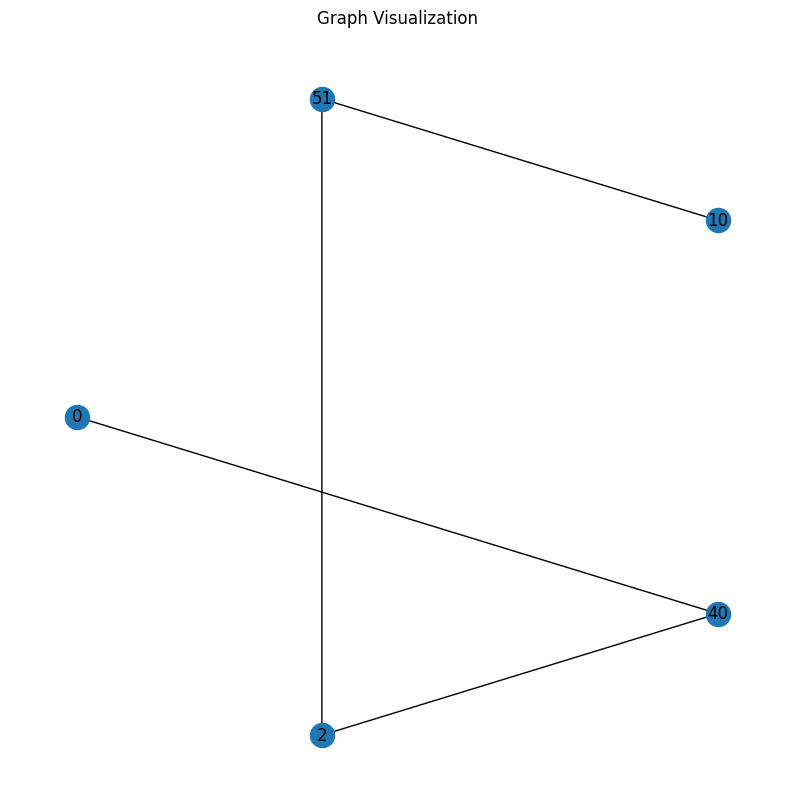

In [10]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw_shell(graph.subgraph(dijkstra_path(graph, source, target)), with_labels=True, node_color='tab:blue')

In [11]:
for i in range(0, 10):
    df.loc[i, 'dijkstra_path'] = timeit.timeit(
        'dijkstra_path(graph, source, target)',
        setup='from __main__ import dijkstra_path, graph, source, target',
        number=1
    )
    
    df.loc[i, 'bellman_ford_path'] = timeit.timeit(
        'bellman_ford_path(graph, source, target)',
        setup='from __main__ import bellman_ford_path, graph, source, target',
        number=1
    )

In [12]:
df

,dijkstra_path,bellman_ford_path
0,0.000583,0.003873
1,0.000676,0.002022
2,0.000638,0.001692
3,0.000652,0.001676
4,0.000529,0.001727
5,0.000769,0.001984
6,0.000529,0.001865
7,0.000409,0.001228
8,0.000367,0.001197
9,0.000368,0.001725


In [13]:
df.mean()

dijkstra_path        0.000552
bellman_ford_path    0.001899
dtype: float64

<h2> Part 2 </h2>


In [14]:
graph = nx.generators.lattice.grid_2d_graph(10, 20)

obstacles = [(np.random.randint(0, 10), np.random.randint(0, 20)) for i in range(40)]
graph.remove_nodes_from(obstacles)

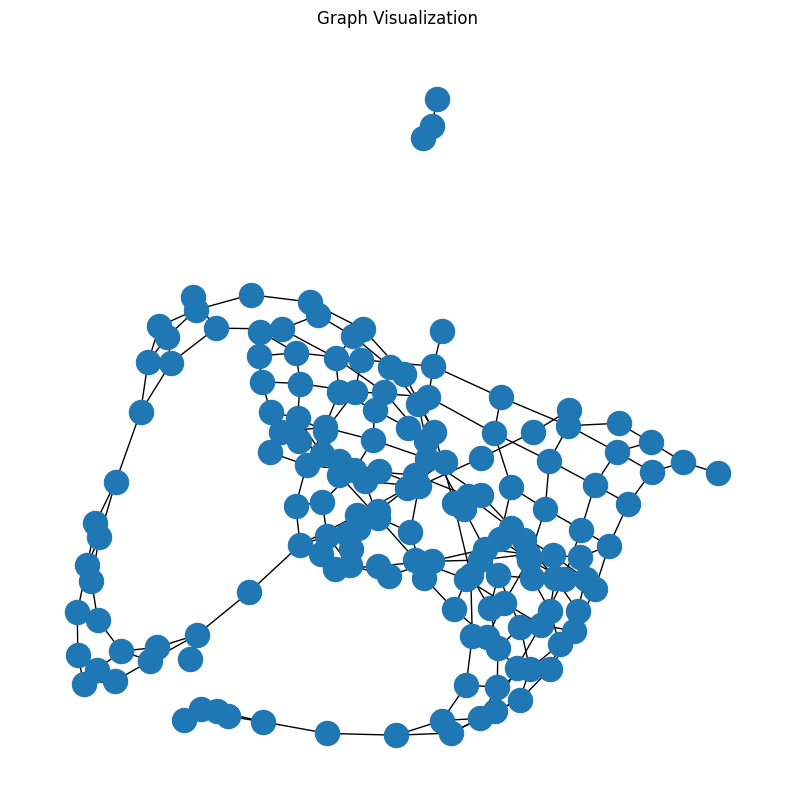

In [16]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw(graph, node_color='tab:blue')

In [17]:
def astar_path(graph, source, target):
    return nx.astar_path(G=graph, source=source, target=target)

In [18]:
graph.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 11), (0, 12), (0, 13), (0, 14), (0, 16), (0, 18), (1, 3), (1, 5), (1, 6), (1, 7), (1, 9), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 0), (3, 1), (3, 2), (3, 3), (3, 5), (3, 6), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 17), (3, 18), (3, 19), (4, 0), (4, 2), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 17), (4, 18), (4, 19), (5, 0), (5, 1), (5, 2), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 0), (6, 1), (6, 3), (6, 5), (6, 6), (6, 7), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (

In [19]:
source = (0, 4)
target = (9, 6)

print('A* Algorithm:', astar_path(graph, source, target))

A* Algorithm: [(0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (9, 6)]


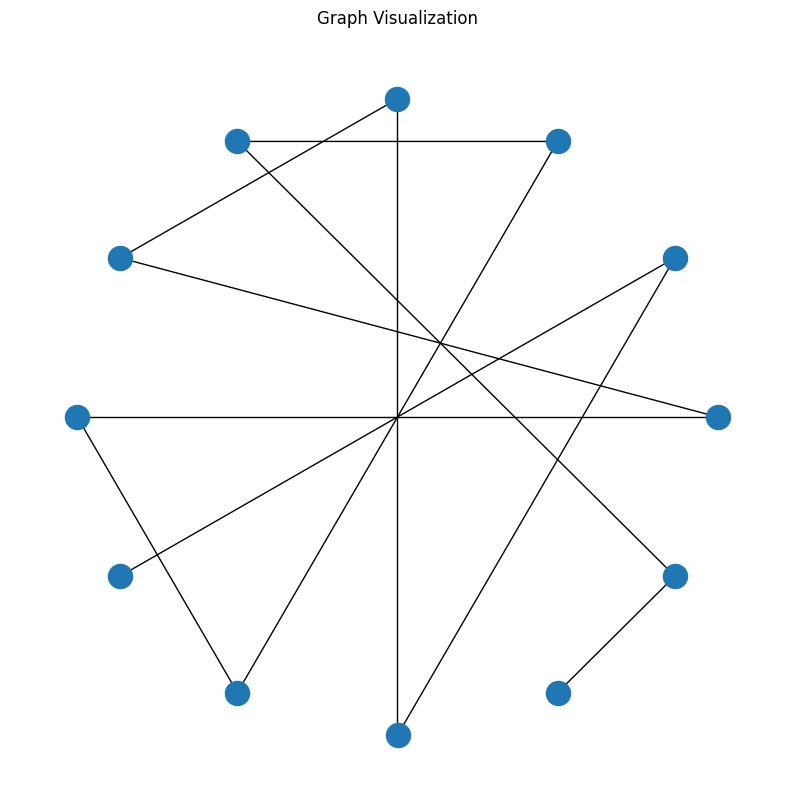

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Graph Visualization')
nx.draw_shell(graph.subgraph(astar_path(graph, source, target)), node_color='tab:blue')

In [24]:
source = (0, 4)
target = (9, 6)

for i in range(0, 5):
    df.loc[i, 'A*'] = timeit.timeit(
        'astar_path(graph, source, target)',
        setup='from __main__ import astar_path, graph, source, target',
        number=1
    )

In [25]:
df['A*'].head()

0    0.000730
1    0.000372
2    0.000414
3    0.000342
4    0.000305
Name: A*, dtype: float64

In [26]:
df['A*'].head().mean()

0.00043262001127004624

In [27]:
df.to_csv('time.csv', index=False)